<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/starup17_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
url ='/content/50_Startups.csv'

data= pd.read_csv(url)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


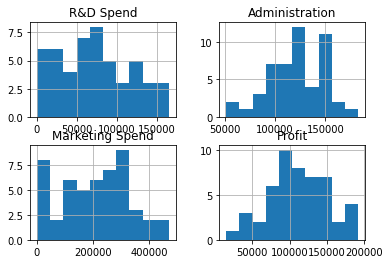

In [32]:
import matplotlib.pyplot as plt
data.hist()
plt.show()

In [33]:
con = data.corr()
print(con)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


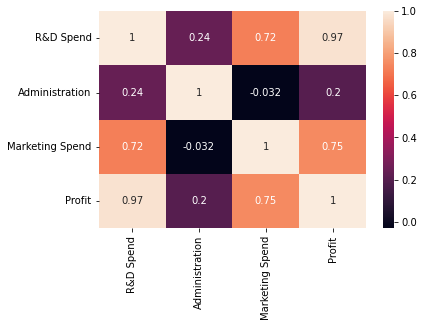

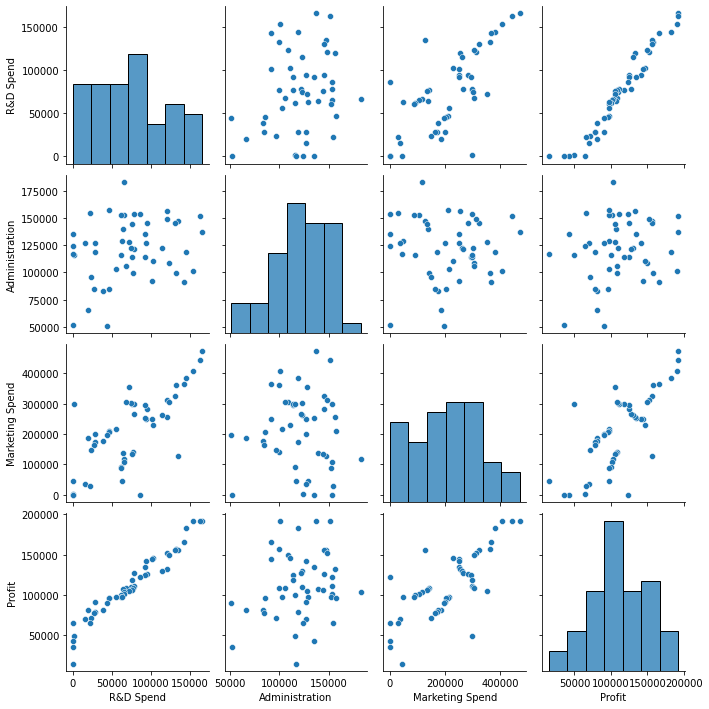

In [34]:
import seaborn as sns
sns.heatmap(con,annot=True)
sns.pairplot(data)

In [38]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['R&D Spend']),y=data['Profit'])



print('he so inter la', model.intercept_) #b
print('he so coef la :', model.coef_) #a


he so inter la 49032.89914125215
he so coef la : [0.85429137]


In [39]:
model.score(X=pd.DataFrame(data['R&D Spend']),y=data['Profit']) #dau vao la rvad dau ra la profit
y_pred= model.predict(X=pd.DataFrame(data['R&D Spend']))   # lay rvad de du doan profit


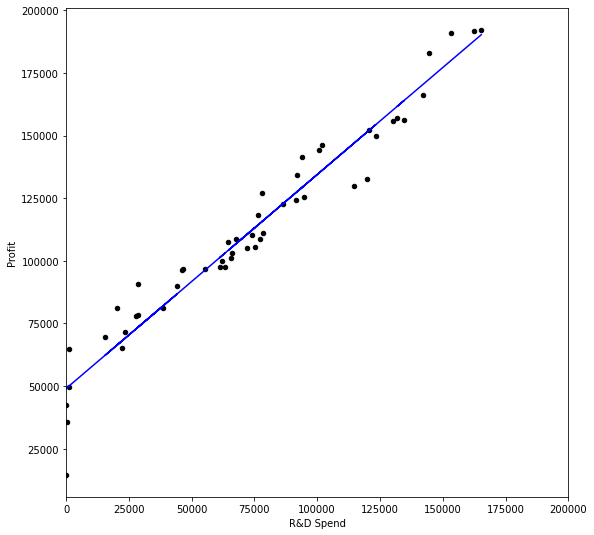

In [44]:
data.plot(kind = 'scatter',x='R&D Spend',y='Profit',figsize=(9,9),color='black',xlim=(0,200000))

plt.plot(data['R&D Spend'],y_pred,color='blue')

In [47]:
model = linear_model.LinearRegression()

X= pd.DataFrame([data['R&D Spend'],data['R&D Spend']**2]).T

model.fit(X,y=data['Profit'])
print('intercept cua mo hinh la', model.intercept_)
print('coef cua mo hinh la', model.coef_)
print('intercept cua mo hinh la', model.score(X,y=data['Profit']))

intercept cua mo hinh la 48128.14916956878
coef cua mo hinh la [ 8.90147291e-01 -2.31821806e-07]
intercept cua mo hinh la 0.946703652909133


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


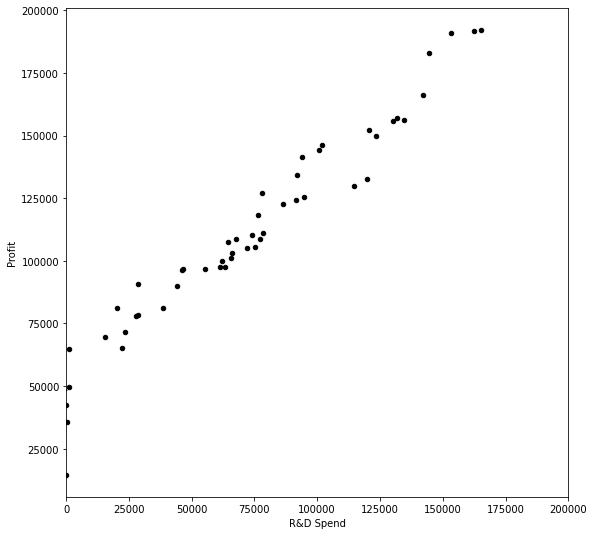

In [52]:
import numpy as np
range = np.arange(1.5,200,1)

X_range = pd.DataFrame([range,range**2]).T

y_pred = model.predict(X=X_range)
data.plot(kind='scatter',x='R&D Spend',y='Profit',figsize=(9,9),color='black',xlim=(0,200000))

plt.plot(range,y_pred,color='blue')